In [36]:
from IPython.core.display import display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

In [2]:
import matplotlib
matplotlib.font_manager._rebuild()
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('./date/train.csv', index_col='id')

In [4]:
dfs = pd.read_csv('./date/test.csv', index_col='id')

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1


In [6]:
dfs.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
6,43,services,married,primary,no,574,yes,no,cellular,8,may,140,1,-1,0,unknown
7,54,technician,married,secondary,no,324,yes,no,telephone,13,may,51,1,-1,0,unknown
8,41,blue-collar,married,secondary,no,121,yes,no,cellular,13,may,16,6,176,5,other
9,52,housemaid,married,primary,no,1466,no,yes,cellular,20,nov,150,1,-1,0,unknown


In [7]:
df.shape

(27128, 17)

In [8]:
dfs.shape

(18083, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27128 entries, 1 to 27128
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27128 non-null  int64 
 1   job        27128 non-null  object
 2   marital    27128 non-null  object
 3   education  27128 non-null  object
 4   default    27128 non-null  object
 5   balance    27128 non-null  int64 
 6   housing    27128 non-null  object
 7   loan       27128 non-null  object
 8   contact    27128 non-null  object
 9   day        27128 non-null  int64 
 10  month      27128 non-null  object
 11  duration   27128 non-null  int64 
 12  campaign   27128 non-null  int64 
 13  pdays      27128 non-null  int64 
 14  previous   27128 non-null  int64 
 15  poutcome   27128 non-null  object
 16  y          27128 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 3.7+ MB


In [10]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18083 entries, 1 to 18083
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        18083 non-null  int64 
 1   job        18083 non-null  object
 2   marital    18083 non-null  object
 3   education  18083 non-null  object
 4   default    18083 non-null  object
 5   balance    18083 non-null  int64 
 6   housing    18083 non-null  object
 7   loan       18083 non-null  object
 8   contact    18083 non-null  object
 9   day        18083 non-null  int64 
 10  month      18083 non-null  object
 11  duration   18083 non-null  int64 
 12  campaign   18083 non-null  int64 
 13  pdays      18083 non-null  int64 
 14  previous   18083 non-null  int64 
 15  poutcome   18083 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.3+ MB


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [12]:
 df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5886,16411,13882,26644,15125,22788,17580,8317,22150


In [13]:
# 変数dfの型の表示
print( type(df) )

<class 'pandas.core.frame.DataFrame'>


In [14]:
# カラムyの表示
print( df['y'] )

id
1        1
2        1
3        1
4        1
5        1
        ..
27124    0
27125    0
27126    0
27127    0
27128    0
Name: y, Length: 27128, dtype: int64


In [15]:
# カラムyのみを取り出したデータの型の表示
print( type(df['y']) )

<class 'pandas.core.series.Series'>


In [16]:
# カラムage, job, yをこの順に取り出したデータの表示
print( df[['age', 'job', 'y']] )

       age           job  y
id                         
1       39   blue-collar  1
2       51  entrepreneur  1
3       36    management  1
4       63       retired  1
5       31    management  1
...    ...           ... ..
27124   42   blue-collar  0
27125   34      services  0
27126   36   blue-collar  0
27127   33     housemaid  0
27128   29      services  0

[27128 rows x 3 columns]


In [17]:
# インデックス2,3 カラムage, job, yをこの順に取り出したデータの表示
print( df.loc[[2, 3], ['age', 'job', 'y']] )

    age           job  y
id                      
2    51  entrepreneur  1
3    36    management  1


In [18]:
# カラムyを取り除いたデータの表示
print( df.drop('y', axis=1) )

       age           job  marital  education default  balance housing loan  \
id                                                                           
1       39   blue-collar  married  secondary      no     1756     yes   no   
2       51  entrepreneur  married    primary      no     1443      no   no   
3       36    management   single   tertiary      no      436      no   no   
4       63       retired  married  secondary      no      474      no   no   
5       31    management   single   tertiary      no      354      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
27124   42   blue-collar  married    primary      no     1455     yes   no   
27125   34      services   single  secondary      no      719     yes   no   
27126   36   blue-collar   single    primary      no       49     yes   no   
27127   33     housemaid  married    primary      no      209      no   no   
27128   29      services   single  secondary      no       40   

In [19]:
# カラムpoutcomeの要素の種類と出現数の表示
print( df['poutcome'].value_counts() )
print()
# カラムyの要素の種類と出現数の表示
print( df['y'].value_counts() )

unknown    22150
failure     2969
other       1123
success      886
Name: poutcome, dtype: int64

0    23954
1     3174
Name: y, dtype: int64


In [20]:
#仮説1. 前回キャンペーンで申し込みの実績がある人はリピートしやすいのではないか（満足できる商品だった場合に限るが）。
# クロス集計の実行
cross = pd.crosstab(df['poutcome'], df['y'], margins=True)

# クロス集計結果の表示
print( cross )

y             0     1    All
poutcome                    
failure    2578   391   2969
other       950   173   1123
success     312   574    886
unknown   20114  2036  22150
All       23954  3174  27128


In [21]:
#データの整形
# クロス集計の実行
cross = pd.crosstab(df['poutcome'], df['y'], margins=True)

# 申込率の計算
rate = cross[1] / cross["All"]

# クロス集計結果に申込率cvrを追加
cross["cvr"] = rate

# 申込率を追加したクロス集計表の表示
print( cross )
print()

# クロス集計表からインデックス'success', 'failure'、カラム'cvr'のみを取り出して表示
print( cross.loc[["success", "failure"], "cvr"])

y             0     1    All       cvr
poutcome                              
failure    2578   391   2969  0.131694
other       950   173   1123  0.154052
success     312   574    886  0.647856
unknown   20114  2036  22150  0.091919
All       23954  3174  27128  0.117001

poutcome
success    0.647856
failure    0.131694
Name: cvr, dtype: float64


In [22]:
#仮説2「定期預金は自由に引き出しができない商品なので、まとまった余裕資金のある人が申し込みやすいのではないだろうか。」
#仮説3「営業との接触時間が長かった人は、申し込み時に気持ちが揺らぎやすいのではないだろうか。」 
# 量的データの相関係数の計算
corr_matrix = df.corr()

# 量的データの相関係数の表示
print( corr_matrix)

               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.095343 -0.008518 -0.005309 -0.001340 -0.025272   
balance   0.095343  1.000000  0.002067  0.019923 -0.016295  0.003613   
day      -0.008518  0.002067  1.000000 -0.032453  0.164880 -0.096889   
duration -0.005309  0.019923 -0.032453  1.000000 -0.087771  0.002030   
campaign -0.001340 -0.016295  0.164880 -0.087771  1.000000 -0.086220   
pdays    -0.025272  0.003613 -0.096889  0.002030 -0.086220  1.000000   
previous  0.002946  0.012483 -0.050009  0.002489 -0.031557  0.421606   
y         0.020892  0.045826 -0.031058  0.401390 -0.076118  0.100930   

          previous         y  
age       0.002946  0.020892  
balance   0.012483  0.045826  
day      -0.050009 -0.031058  
duration  0.002489  0.401390  
campaign -0.031557 -0.076118  
pdays     0.421606  0.100930  
previous  1.000000  0.083825  
y         0.083825  1.000000  


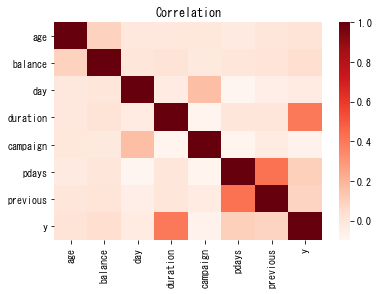

In [23]:
# heatmapを作成
sns.heatmap(corr_matrix, cmap="Reds")

# グラフにタイトルを追加
plt.title("Correlation")

# グラフを表示
plt.show()

In [24]:
# yの値が1のデータを表示
print( df[df['y']== 1] )

print()
# yの値が1のデータのdurationを表示
print( df[df['y']==1]['duration'] )

       age           job  marital  education default  balance housing loan  \
id                                                                           
1       39   blue-collar  married  secondary      no     1756     yes   no   
2       51  entrepreneur  married    primary      no     1443      no   no   
3       36    management   single   tertiary      no      436      no   no   
4       63       retired  married  secondary      no      474      no   no   
5       31    management   single   tertiary      no      354      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
27075   34    unemployed  married    primary      no      309      no   no   
27090   50    management  married   tertiary      no      414     yes   no   
27106   44    management   single   tertiary      no     5063      no   no   
27109   33   blue-collar  married  secondary      no      661     yes   no   
27116   42    management  married   tertiary      no    27696   

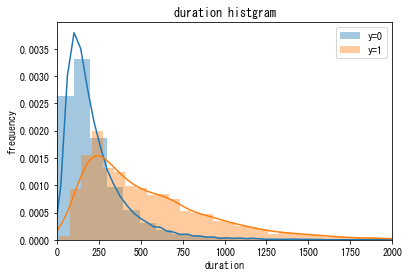

In [25]:
# durationの抜き出し
duration_0 = df[df['y']==0]['duration']
duration_1 = df[df['y']==1]['duration']

# ヒストグラムの作成
sns.distplot(duration_0, label='y=0')
sns.distplot(duration_1, label='y=1')

# グラフにタイトルを追加
plt.title("duration histgram")

# グラフのx軸に名前を追加
plt.xlabel('duration')

# グラフのy軸に名前を追加
plt.ylabel("frequency")

# x軸の表示範囲の指定
plt.xlim(0, 2000)

# グラフに凡例を追加
plt.legend()

# グラフを表示
plt.show()

In [26]:
# data_yに目的変数を代入
data_y = df['y']

# data_yの表示
print( data_y )
print()

# data_Xに説明変数を代入
data_X = df.drop('y', axis=1)

# ダミー変数化
data_X = pd.get_dummies(data_X)

# data_Xの表示
print(data_X)

id
1        1
2        1
3        1
4        1
5        1
        ..
27124    0
27125    0
27126    0
27127    0
27128    0
Name: y, Length: 27128, dtype: int64

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
id                                                                          
1       39     1756    3       939         1     -1         0           0   
2       51     1443   18       172        10     -1         0           0   
3       36      436   13       567         1    595         2           0   
4       63      474   25       423         1     -1         0           0   
5       31      354   30       502         1      9         2           0   
...    ...      ...  ...       ...       ...    ...       ...         ...   
27124   42     1455    2       279         2    269         2           0   
27125   34      719   15       362         3     -1         0           0   
27126   36       49    8       405         1     -1         0       

In [27]:
# test_Xに説明変数を代入
test_X = dfs

# ダミー変数化
test_X = pd.get_dummies(test_X)

# test_Xの表示
print(test_X)

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
id                                                                          
1       30     1028    4      1294         2     -1         0           0   
2       39      426   18      1029         1     -1         0           0   
3       38     -572    5        26        24     -1         0           0   
4       34     -476   27        92         4     -1         0           0   
5       37       62   31       404         2     -1         0           0   
...    ...      ...  ...       ...       ...    ...       ...         ...   
18079   30       32    6       122         3     -1         0           0   
18080   35     1557    5       225         1    268         1           0   
18081   33     1713    8        22         1     -1         0           0   
18082   37     -251   12       146         3    370         1           0   
18083   34       56   19        91         2     -1         0           0   

In [28]:
pipe_xgb = Pipeline([('pca', PCA()),('est',xgb.XGBClassifier(random_state=0))])
pipe_xgb.fit(data_X,data_y)
print(np.average(cross_val_score(pipe_xgb,data_X,data_y,scoring='roc_auc',cv=5)))

0.9234463891367233


In [29]:
pipe_cat = Pipeline([('pca', PCA()),('est',CatBoostClassifier(random_state=0,verbose=False))])
pipe_cat.fit(data_X,data_y)
print(np.average(cross_val_score(pipe_cat,data_X,data_y,scoring='roc_auc',cv=5)))

0.9315982258512318


In [30]:
pipe_lgb = Pipeline([('pca', PCA()),('est',lgb.LGBMClassifier(random_state=0))])
pipe_lgb.fit(data_X,data_y)
print(np.average(cross_val_score(pipe_lgb,data_X,data_y,scoring='roc_auc',cv=5)))

0.9274279035023858


In [35]:
pipe_gb = Pipeline([('pca', PCA()),('est',GradientBoostingClassifier(random_state=0))])
pipe_gb.fit(data_X,data_y)
print(np.average(cross_val_score(pipe_gb,data_X,data_y,scoring='roc_auc',cv=5)))

0.9231432832122433


In [32]:
pipe_svc = Pipeline([('scl',StandardScaler()),('pca', PCA()),('est',SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=0))])
pipe_svc.fit(data_X,data_y)
print(np.average(cross_val_score(pipe_svc,data_X,data_y,scoring='roc_auc',cv=5)))

0.917183219233911


In [33]:
pipe_mlp = Pipeline([('scl',StandardScaler()),('pca', PCA()),('est',MLPClassifier(hidden_layer_sizes=(3,3),max_iter=1000,random_state=0))])
pipe_mlp.fit(data_X,data_y)
print(np.average(cross_val_score(pipe_mlp,data_X,data_y,scoring='roc_auc',cv=5)))

0.9182058826874859


In [34]:
pipe_rf = Pipeline([('pca', PCA()),('est',RandomForestClassifier(random_state=0))])
pipe_rf.fit(data_X,data_y)
print(np.average(cross_val_score(pipe_rf,data_X,data_y,scoring='roc_auc',cv=5)))

0.9190967637819634


In [38]:
data_X_columns = data_X.columns.values
selector = RFECV(estimator=RandomForestClassifier(random_state=0), step=1)
selector.fit(data_X,data_y)
X_selected = selector.transform(data_X)
X_selected = pd.DataFrame(X_selected, columns=data_X_columns[selector.support_])
print(X_selected.shape)
print(display(X_selected.head()))

(27128, 32)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_management,job_technician,marital_married,marital_single,education_primary,education_secondary,education_tertiary,housing_no,housing_yes,loan_yes,contact_cellular,contact_unknown,month_apr,month_aug,month_feb,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
0,39,1756,3,939,1,-1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,51,1443,18,172,10,-1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,36,436,13,567,1,595,2,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,63,474,25,423,1,-1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,31,354,30,502,1,9,2,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


None


In [42]:
pipe_cat2 = Pipeline([('scl',StandardScaler()),('pca', PCA()),('est',CatBoostClassifier(random_state=0,verbose=False))])
pipe_cat2.fit(X_selected,data_y)
print(np.average(cross_val_score(pipe_cat2,X_selected,data_y,scoring='roc_auc',cv=5)))

0.9240888010172637


In [40]:
pipe_cat3 = Pipeline([('est',CatBoostClassifier(random_state=0,verbose=False))])
pipe_cat3.fit(X_selected,data_y)
print(np.average(cross_val_score(pipe_cat3,X_selected,data_y,scoring='roc_auc',cv=5)))

0.9334448834482721


In [43]:
pipe_cat4 = Pipeline([('scl',StandardScaler()),('est',CatBoostClassifier(random_state=0,verbose=False))])
pipe_cat4.fit(X_selected,data_y)
print(np.average(cross_val_score(pipe_cat4,X_selected,data_y,scoring='roc_auc',cv=5)))

0.9334447519681511


In [44]:
pipe_cat5 = Pipeline([('pca', PCA()),('est',CatBoostClassifier(random_state=0,verbose=False))])
pipe_cat5.fit(X_selected,data_y)
print(np.average(cross_val_score(pipe_cat5,X_selected,data_y,scoring='roc_auc',cv=5)))

0.9328857012138387


In [45]:
test_X = pd.DataFrame(test_X, columns=data_X_columns)
test_X_selected = test_X.loc[:, data_X_columns[selector.support_]]
print(test_X_selected.shape)
print(display(test_X_selected.head()))

(18083, 32)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_management,job_technician,marital_married,marital_single,education_primary,education_secondary,education_tertiary,housing_no,housing_yes,loan_yes,contact_cellular,contact_unknown,month_apr,month_aug,month_feb,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,1028,4,1294,2,-1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,39,426,18,1029,1,-1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,38,-572,5,26,24,-1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,34,-476,27,92,4,-1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,37,62,31,404,2,-1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


None


In [46]:
test_y = pipe_cat3.predict_proba(test_X_selected)[:,1]
test_y

array([6.18938038e-01, 5.96334877e-01, 9.15809126e-05, ...,
       2.23150819e-04, 1.73116071e-03, 2.68534087e-03])

In [47]:
score = pd.read_csv('./date/submit_sample.csv',header=None)

In [48]:
score[1] = test_y
score

,0,1
0,1,0.618938
1,2,0.596335
2,3,0.000092
3,4,0.000140
4,5,0.061978
...,...,...
18078,18079,0.000481
18079,18080,0.055685
18080,18081,0.000223
18081,18082,0.001731


In [49]:
score.to_csv('score2.csv',header=False,index=False)